# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [4]:
!pip install numpy
!pip install matplotlib
!pip install imageio

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 12.9/12.9 MB 80.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 83.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 129.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 76.2 MB/s eta 0:00:00


In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\10174\AppData\Local\Temp\ipykernel_31240\187924686.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_31240\187924686.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


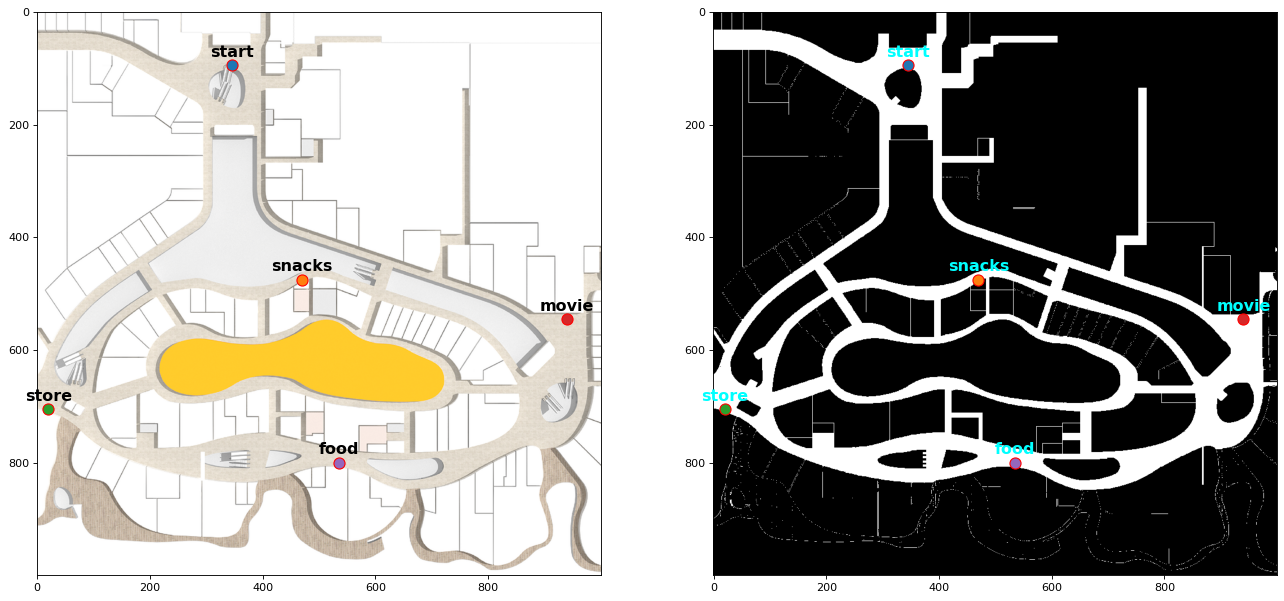

Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


In [6]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

## Task 1_A*

C:\Users\10174\AppData\Local\Temp\ipykernel_11728\3214765165.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_11728\3214765165.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


Total travel distance: 2815.80 meters
Total cells visited: 53720
Total runtime: 3.82 seconds
Shortest distance matrix (m):
start   |     0.0 |   125.2 |   131.2 |   157.8 |   197.8 | 
snacks  |   133.8 |     0.0 |   104.6 |   110.2 |   118.4 | 
store   |   132.8 |    99.6 |     0.0 |   214.0 |   104.6 | 
movie   |   202.8 |    97.4 |   203.4 |     0.0 |   166.8 | 
food    |   197.6 |   113.2 |   105.4 |    99.2 |     0.0 | 


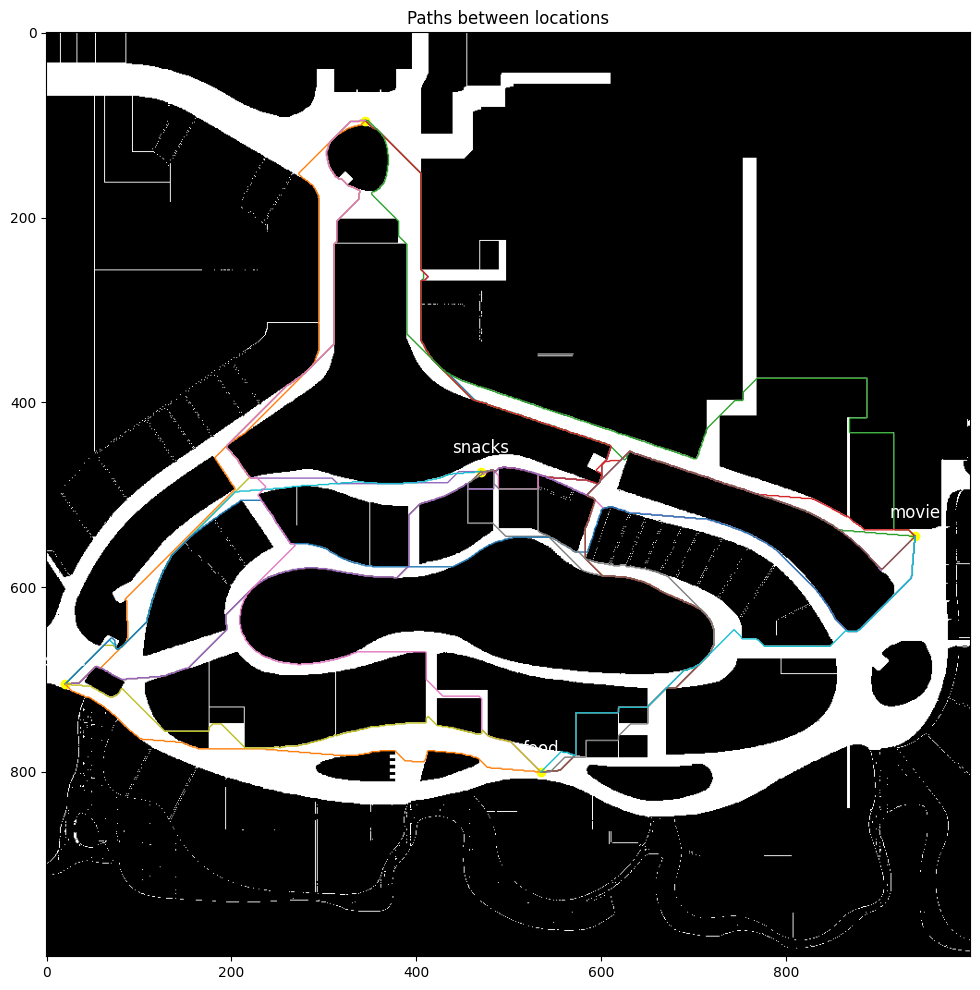

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import imageio
import time

# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# Map resolution
MAP_RES = 0.2

# Locations
def to_tuple(lst):
    return tuple(lst)

locations = {'start':  [345, 95],
             'snacks': [470, 475],
             'store':  [20, 705],
             'movie':  [940, 545],
             'food':   [535, 800]}

# A* algorithm
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def astar(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    visited_cells = set()

    while open_set:
        _, current = heapq.heappop(open_set)
        visited_cells.add(current)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], visited_cells

        for dx, dy in [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,-1),(1,-1),(-1,1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] != 0):
                step_cost = 0.282 if abs(dx)+abs(dy) == 2 else 0.2
                tentative_g = g_score[current] + step_cost
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
    return None, visited_cells

# Calculate all distances
distance_matrix = {}
total_distance = 0
visited_cells_all = set()
start_time = time.time()

for from_key, from_loc in locations.items():
    distance_matrix[from_key] = {}
    for to_key, to_loc in locations.items():
        if from_key == to_key:
            distance_matrix[from_key][to_key] = 0.0
        else:
            path, visited_cells = astar(grid_map, to_tuple(from_loc), to_tuple(to_loc))
            visited_cells_all.update(visited_cells)
            distance = len(path) * MAP_RES if path else float('inf')
            distance_matrix[from_key][to_key] = round(distance, 2)
            total_distance += distance

end_time = time.time()

# Output metrics
print(f"Total travel distance: {total_distance:.2f} meters")
print(f"Total cells visited: {len(visited_cells_all)}")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

# Print Distance Table
print("Shortest distance matrix (m):")
for from_key in locations:
    print(f"{from_key:7}", end=' | ')
    for to_key in locations:
        print(f"{distance_matrix[from_key][to_key]:7}", end=' | ')
    print()

# Plot all paths on the map
plt.figure(figsize=(12, 12))
plt.imshow(grid_map_img, cmap='gray')

for key in locations:
    plt.scatter(*locations[key], c='yellow', marker='o')
    plt.text(locations[key][0], locations[key][1]-20, key, color='white', fontsize=12, ha='center')

for from_key in locations:
    for to_key in locations:
        if from_key != to_key:
            path, _ = astar(grid_map, to_tuple(locations[from_key]), to_tuple(locations[to_key]))
            if path:
                path = np.array(path)
                plt.plot(path[:,0], path[:,1], linewidth=1)

plt.title('Paths between locations')
plt.savefig('planned_paths.png')
plt.show()


## Task 1_Hybrid A*

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import imageio
import time

# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# Map resolution
MAP_RES = 0.2

# Locations
def to_tuple(lst):
    return tuple(lst)

locations = {'start':  [345, 95],
             'snacks': [470, 475],
             'store':  [20, 705],
             'movie':  [940, 545],
             'food':   [535, 800]}

# Hybrid A* algorithm
class Node:
    def __init__(self, x, y, theta, g, f, parent=None):
        self.x = x
        self.y = y
        self.theta = theta
        self.g = g
        self.f = f
        self.parent = parent

    def __lt__(self, other):
        return self.f < other.f

def heuristic(x, y, goal):
    return np.hypot(goal[0] - x, goal[1] - y)

def hybrid_astar(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    visited_cells = set()
    start_node = Node(start[0], start[1], 0, 0, heuristic(start[0], start[1], goal))
    heapq.heappush(open_set, start_node)

    motions = [(np.cos(theta), np.sin(theta), theta) for theta in np.linspace(0, 2 * np.pi, 16, endpoint=False)]

    while open_set:
        current = heapq.heappop(open_set)
        visited_cells.add((int(current.x), int(current.y)))

        if heuristic(current.x, current.y, goal) < 1.5:
            path = []
            while current:
                path.append((int(current.x), int(current.y)))
                current = current.parent
            return path[::-1], visited_cells

        for dx, dy, dtheta in motions:
            nx, ny = current.x + dx, current.y + dy
            if 0 <= int(nx) < rows and 0 <= int(ny) < cols and grid[int(nx), int(ny)] != 0:
                ng = current.g + np.hypot(dx, dy)
                nf = ng + heuristic(nx, ny, goal)
                neighbor = Node(nx, ny, dtheta, ng, nf, current)
                heapq.heappush(open_set, neighbor)

    return None, visited_cells

# Calculate all distances
distance_matrix = {}
total_distance = 0
visited_cells_all = set()
start_time = time.time()

for from_key, from_loc in locations.items():
    distance_matrix[from_key] = {}
    for to_key, to_loc in locations.items():
        if from_key == to_key:
            distance_matrix[from_key][to_key] = 0.0
        else:
            path, visited_cells = hybrid_astar(grid_map, to_tuple(from_loc), to_tuple(to_loc))
            visited_cells_all.update(visited_cells)
            distance = len(path) * MAP_RES if path else float('inf')
            distance_matrix[from_key][to_key] = round(distance, 2)
            total_distance += distance

end_time = time.time()

# Output metrics
print(f"Total travel distance: {total_distance:.2f} meters")
print(f"Total cells visited: {len(visited_cells_all)}")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

# Print Distance Table
print("Shortest distance matrix (m):")
for from_key in locations:
    print(f"{from_key:7}", end=' | ')
    for to_key in locations:
        print(f"{distance_matrix[from_key][to_key]:7}", end=' | ')
    print()

# Plot all paths on the map
plt.figure(figsize=(12, 12))
plt.imshow(grid_map_img, cmap='gray')

for key in locations:
    plt.scatter(*locations[key], c='yellow', marker='o')
    plt.text(locations[key][0], locations[key][1]-20, key, color='white', fontsize=12, ha='center')

for from_key in locations:
    for to_key in locations:
        if from_key != to_key:
            path, _ = hybrid_astar(grid_map, to_tuple(locations[from_key]), to_tuple(locations[to_key]))
            if path:
                path = np.array(path)
                plt.plot(path[:,0], path[:,1], linewidth=1)

plt.title('Paths between locations (Hybrid A*)')
plt.savefig('planned_paths_hybrid_astar.png')
plt.show()


C:\Users\10174\AppData\Local\Temp\ipykernel_11728\1245981603.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_11728\1245981603.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


## Task 1_Greedy Best First Search

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import imageio
import time

# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# Map resolution
MAP_RES = 0.2

# Locations
def to_tuple(lst):
    return tuple(lst)

locations = {'start':  [345, 95],
             'snacks': [470, 475],
             'store':  [20, 705],
             'movie':  [940, 545],
             'food':   [535, 800]}

# Greedy Best First Search algorithm
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def greedy_bfs(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), start))
    came_from = {}
    visited_cells = set()

    while open_set:
        _, current = heapq.heappop(open_set)
        visited_cells.add(current)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], visited_cells

        for dx, dy in [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,-1),(1,-1),(-1,1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] != 0 and neighbor not in visited_cells):
                heapq.heappush(open_set, (heuristic(neighbor, goal), neighbor))
                if neighbor not in came_from:
                    came_from[neighbor] = current

    return None, visited_cells

# Example execution and metrics
start_time = time.time()
path, visited_cells = greedy_bfs(grid_map, to_tuple(locations['start']), to_tuple(locations['snacks']))
end_time = time.time()

# Output metrics
print(f"Total travel distance: {len(path) * MAP_RES:.2f} meters")
print(f"Total cells visited: {len(visited_cells)}")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

# Plot path on the map
plt.figure(figsize=(10, 10))
plt.imshow(grid_map_img, cmap='gray')

for key in locations:
    plt.scatter(*locations[key], c='yellow', marker='o')
    plt.text(locations[key][0], locations[key][1]-20, key, color='white', fontsize=12, ha='center')

if path:
    path = np.array(path)
    plt.plot(path[:,0], path[:,1], 'r-', linewidth=2, label='Greedy Best First Search Path')

plt.legend()
plt.title('Greedy Best First Search Path')
plt.savefig('planned_paths_greedy_bfs.png')
plt.show()


C:\Users\10174\AppData\Local\Temp\ipykernel_26816\1626044310.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_26816\1626044310.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


KeyboardInterrupt: 

## Task 1_Dijkstra

C:\Users\10174\AppData\Local\Temp\ipykernel_26816\650792771.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
C:\Users\10174\AppData\Local\Temp\ipykernel_26816\650792771.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


Total travel distance: 2613.60 meters
Total cells visited: 173730
Total runtime: 10.62 seconds
Shortest distance matrix (m):
start   |     0.0 |   124.6 |   131.6 |   157.0 |   194.4 | 
snacks  |   124.6 |     0.0 |    99.2 |    94.4 |   113.0 | 
store   |   131.6 |    99.2 |     0.0 |   192.4 |   103.2 | 
movie   |   157.0 |    94.4 |   192.4 |     0.0 |    97.0 | 
food    |   194.4 |   113.0 |   103.2 |    97.0 |     0.0 | 


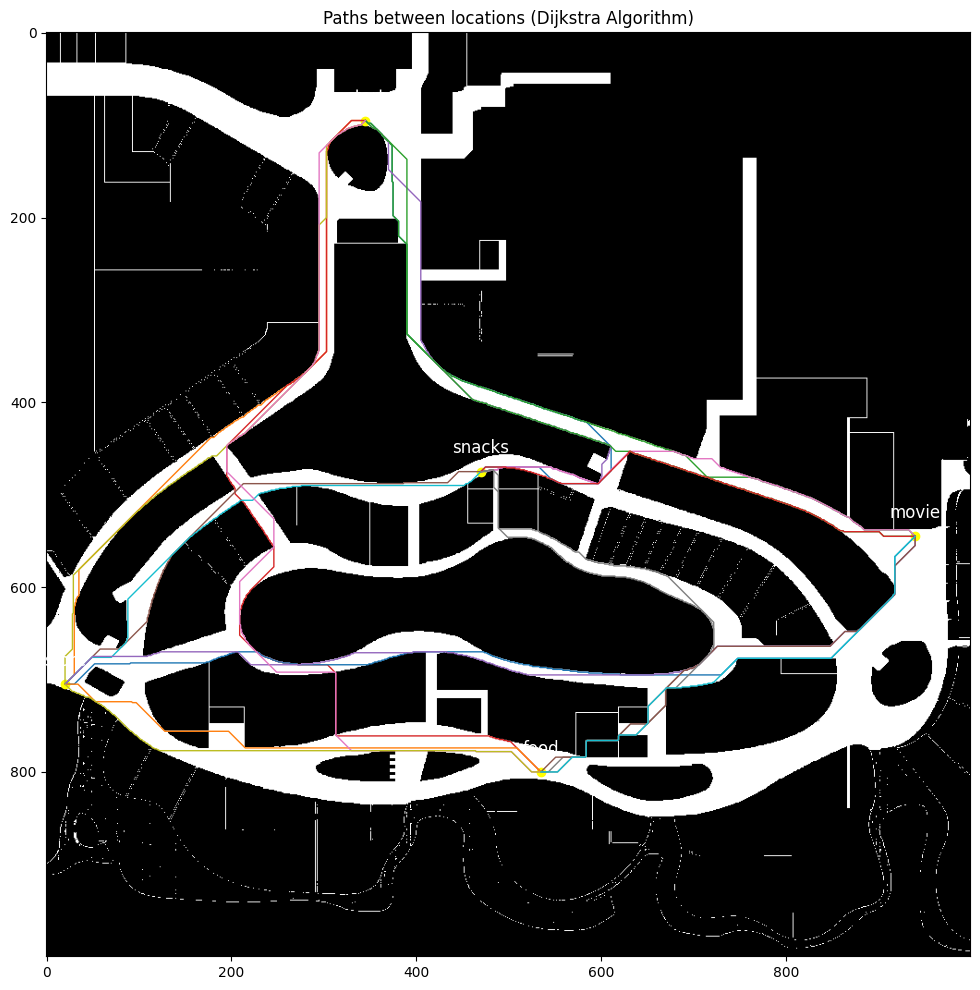

In [4]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import imageio
import time

# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# Map resolution
MAP_RES = 0.2

# Locations
def to_tuple(lst):
    return tuple(lst)

locations = {'start':  [345, 95],
             'snacks': [470, 475],
             'store':  [20, 705],
             'movie':  [940, 545],
             'food':   [535, 800]}

# Dijkstra algorithm
def dijkstra(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    cost_so_far = {start: 0}
    visited_cells = set()

    while open_set:
        current_cost, current = heapq.heappop(open_set)
        visited_cells.add(current)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], visited_cells

        for dx, dy in [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,-1),(1,-1),(-1,1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] != 0):
                step_cost = 0.282 if abs(dx)+abs(dy) == 2 else 0.2
                new_cost = current_cost + step_cost
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    heapq.heappush(open_set, (new_cost, neighbor))
                    came_from[neighbor] = current

    return None, visited_cells

# Calculate all distances
distance_matrix = {}
total_distance = 0
visited_cells_all = set()
start_time = time.time()

for from_key, from_loc in locations.items():
    distance_matrix[from_key] = {}
    for to_key, to_loc in locations.items():
        if from_key == to_key:
            distance_matrix[from_key][to_key] = 0.0
        else:
            path, visited_cells = dijkstra(grid_map, to_tuple(from_loc), to_tuple(to_loc))
            visited_cells_all.update(visited_cells)
            distance = len(path) * MAP_RES if path else float('inf')
            distance_matrix[from_key][to_key] = round(distance, 2)
            total_distance += distance

end_time = time.time()

# Output metrics
print(f"Total travel distance: {total_distance:.2f} meters")
print(f"Total cells visited: {len(visited_cells_all)}")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

# Print Distance Table
print("Shortest distance matrix (m):")
for from_key in locations:
    print(f"{from_key:7}", end=' | ')
    for to_key in locations:
        print(f"{distance_matrix[from_key][to_key]:7}", end=' | ')
    print()

# Plot all paths on the map
plt.figure(figsize=(12, 12))
plt.imshow(grid_map_img, cmap='gray')

for key in locations:
    plt.scatter(*locations[key], c='yellow', marker='o')
    plt.text(locations[key][0], locations[key][1]-20, key, color='white', fontsize=12, ha='center')

for from_key in locations:
    for to_key in locations:
        if from_key != to_key:
            path, _ = dijkstra(grid_map, to_tuple(locations[from_key]), to_tuple(locations[to_key]))
            if path:
                path = np.array(path)
                plt.plot(path[:,0], path[:,1], linewidth=1)

plt.title('Paths between locations (Dijkstra Algorithm)')
plt.savefig('planned_paths_dijkstra.png')
plt.show()

## Task 2_Permutation

Optimal shopping route: start -> snacks -> movie -> food -> store -> start
Total distance: 550.80 meters


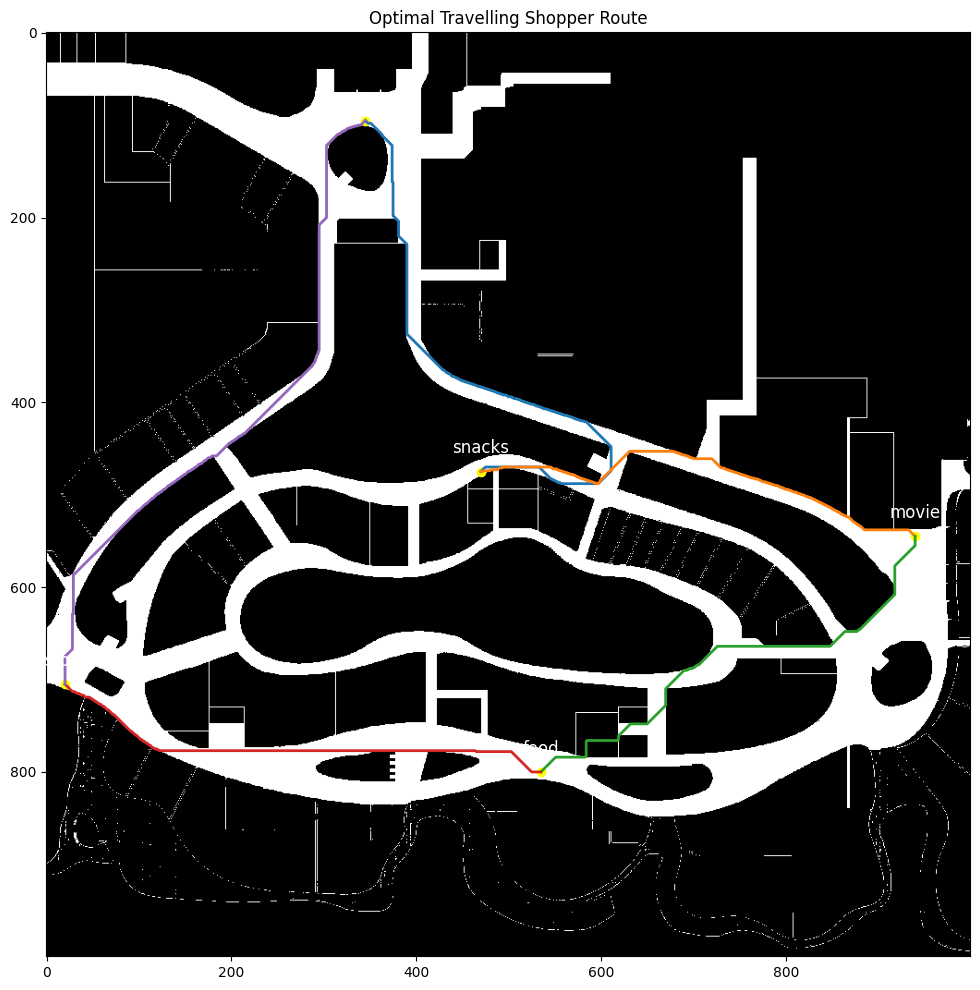

In [5]:
from itertools import permutations

# 已知的距离矩阵（Task 1 Dijkstra结果）
distance_matrix = {
    'start': {'start': 0.0, 'snacks': 124.6, 'store': 131.6, 'movie': 157.0, 'food': 194.4},
    'snacks': {'start': 124.6, 'snacks': 0.0, 'store': 99.2, 'movie': 94.4, 'food': 113.0},
    'store': {'start': 131.6, 'snacks': 99.2, 'store': 0.0, 'movie': 192.4, 'food': 103.2},
    'movie': {'start': 157.0, 'snacks': 94.4, 'store': 192.4, 'movie': 0.0, 'food': 97.0},
    'food': {'start': 194.4, 'snacks': 113.0, 'store': 103.2, 'movie': 97.0, 'food': 0.0}
}

# Travelling Shopper问题求解函数
def find_optimal_route(dist_matrix, locations, start='start'):
    points = [loc for loc in locations if loc != start]
    min_distance = float('inf')
    best_route = None

    for perm in permutations(points):
        distance = dist_matrix[start][perm[0]]
        for i in range(len(perm) - 1):
            distance += dist_matrix[perm[i]][perm[i+1]]
        distance += dist_matrix[perm[-1]][start]

        if distance < min_distance:
            min_distance = distance
            best_route = (start,) + perm + (start,)

    return best_route, min_distance

# 执行函数并输出最优路径和距离
optimal_route, optimal_distance = find_optimal_route(distance_matrix, locations)
print(f"Optimal shopping route: {' -> '.join(optimal_route)}")
print(f"Total distance: {optimal_distance:.2f} meters")

# 绘制最优路径
plt.figure(figsize=(12, 12))
plt.imshow(grid_map_img, cmap='gray')

for key in locations:
    plt.scatter(*locations[key], c='yellow', marker='o')
    plt.text(locations[key][0], locations[key][1]-20, key, color='white', fontsize=12, ha='center')

for i in range(len(optimal_route)-1):
    from_loc = optimal_route[i]
    to_loc = optimal_route[i+1]
    path, _ = dijkstra(grid_map, to_tuple(locations[from_loc]), to_tuple(locations[to_loc]))
    if path:
        path = np.array(path)
        plt.plot(path[:,0], path[:,1], linewidth=2)

plt.title('Optimal Travelling Shopper Route')
plt.savefig('optimal_travelling_shopper_route.png')
plt.show()

## Task 2_Nearest neighbor law (greed law)

Nearest Neighbor route: start -> snacks -> movie -> food -> store -> start
Total distance (Nearest Neighbor): 550.80 meters


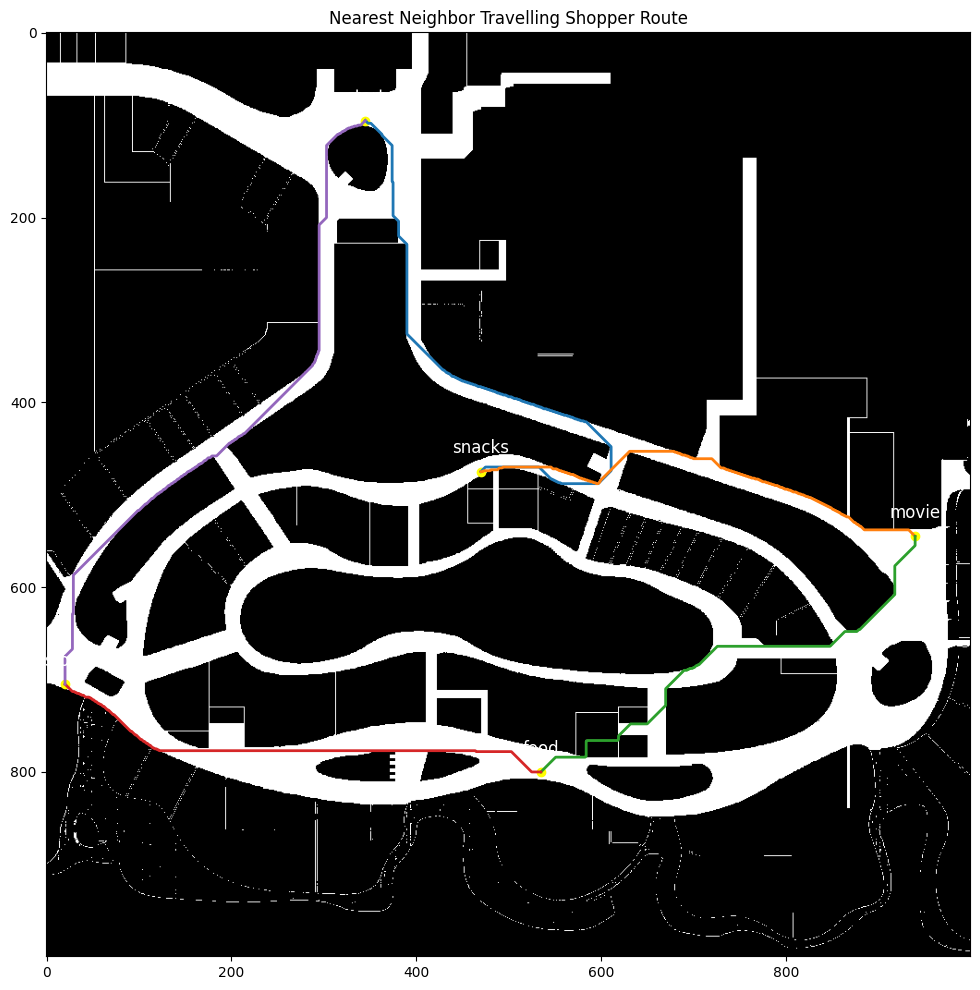

In [6]:
# 已知的距离矩阵（Task 1 Dijkstra结果）
distance_matrix = {
    'start': {'start': 0.0, 'snacks': 124.6, 'store': 131.6, 'movie': 157.0, 'food': 194.4},
    'snacks': {'start': 124.6, 'snacks': 0.0, 'store': 99.2, 'movie': 94.4, 'food': 113.0},
    'store': {'start': 131.6, 'snacks': 99.2, 'store': 0.0, 'movie': 192.4, 'food': 103.2},
    'movie': {'start': 157.0, 'snacks': 94.4, 'store': 192.4, 'movie': 0.0, 'food': 97.0},
    'food': {'start': 194.4, 'snacks': 113.0, 'store': 103.2, 'movie': 97.0, 'food': 0.0}
}
# Nearest Neighbor (贪婪法) 完整实现
def nearest_neighbor(dist_matrix, locations, start='start'):
    points = set(locations.keys())
    points.remove(start)
    route = [start]
    total_distance = 0
    current = start

    while points:
        next_point = min(points, key=lambda p: dist_matrix[current][p])
        total_distance += dist_matrix[current][next_point]
        route.append(next_point)
        points.remove(next_point)
        current = next_point

    total_distance += dist_matrix[current][start]  # 返回起点
    route.append(start)

    return route, total_distance

# 执行函数并输出近邻法路径和距离
nn_route, nn_distance = nearest_neighbor(distance_matrix, locations)
print(f"Nearest Neighbor route: {' -> '.join(nn_route)}")
print(f"Total distance (Nearest Neighbor): {nn_distance:.2f} meters")

# 绘制近邻法路径
plt.figure(figsize=(12, 12))
plt.imshow(grid_map_img, cmap='gray')

for key in locations:
    plt.scatter(*locations[key], c='yellow', marker='o')
    plt.text(locations[key][0], locations[key][1]-20, key, color='white', fontsize=12, ha='center')

for i in range(len(nn_route)-1):
    from_loc = nn_route[i]
    to_loc = nn_route[i+1]
    path, _ = dijkstra(grid_map, to_tuple(locations[from_loc]), to_tuple(locations[to_loc]))
    if path:
        path = np.array(path)
        plt.plot(path[:,0], path[:,1], linewidth=2)

plt.title('Nearest Neighbor Travelling Shopper Route')
plt.savefig('nearest_neighbor_travelling_shopper_route.png')
plt.show()

## Task 3

In [ ]:
https://github.com/CANLAN-SC/A0303599U_Homework3.git